# Exploring the training data set for stage 3


In [2]:
import pickle
import matplotlib.pyplot as plt

training set size: 360 testing set size: 40


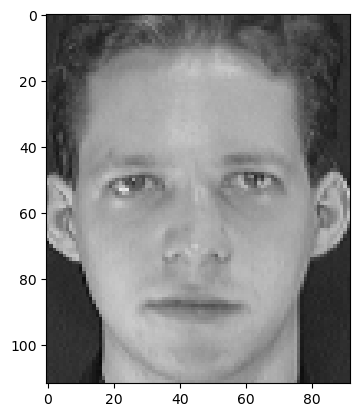

1


In [3]:
f = open('./data/ORL', 'rb')
data = pickle.load(f)

f.close()

print('training set size:', len(data['train']), 'testing set size:', len(data['test']))

for pair in data['train']:
    #for pair in data['test']:
    plt.imshow(pair['image'], cmap="Greys")
    plt.show()
    print(pair['label'])
    break

In [4]:
print(data['train'][0])
print(f" width: {len(data['train'][0]['image'])} height: {len(data['train'][0]['image'][0])}")

{'image': array([[[48, 48, 48],
        [49, 49, 49],
        [45, 45, 45],
        ...,
        [56, 56, 56],
        [56, 56, 56],
        [54, 54, 54]],

       [[45, 45, 45],
        [52, 52, 52],
        [39, 39, 39],
        ...,
        [52, 52, 52],
        [50, 50, 50],
        [51, 51, 51]],

       [[45, 45, 45],
        [50, 50, 50],
        [42, 42, 42],
        ...,
        [48, 48, 48],
        [53, 53, 53],
        [50, 50, 50]],

       ...,

       [[50, 50, 50],
        [48, 48, 48],
        [50, 50, 50],
        ...,
        [45, 45, 45],
        [46, 46, 46],
        [46, 46, 46]],

       [[45, 45, 45],
        [54, 54, 54],
        [49, 49, 49],
        ...,
        [46, 46, 46],
        [47, 47, 47],
        [47, 47, 47]],

       [[51, 51, 51],
        [51, 51, 51],
        [51, 51, 51],
        ...,
        [47, 47, 47],
        [46, 46, 46],
        [46, 46, 46]]], dtype=uint8), 'label': 1}
 width: 112 height: 92


In [5]:
print(data['train'][0]['label'])

1


In [6]:
from torch import nn
import torch

In [38]:
newX = torch.from_numpy(data['train'][0]['image'])
newX.shape

torch.Size([112, 92, 3])

In [39]:
# Have to permute to have the color channel to the front of the tensor
newX = newX.permute(2,0,1)
newX = newX.unsqueeze(0).float()
newX.shape

torch.Size([1, 3, 112, 92])

In [40]:
scaled = nn.functional.interpolate(newX, (92, 92), mode='bilinear')
scaled.shape

torch.Size([1, 3, 92, 92])

# Further improvement that may be done later
## Data range and Normalization